In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess
from gensim.parsing.porter import PorterStemmer

In [2]:
data=pd.read_csv("Data/Books_rating.csv")

In [3]:
subsetData=data.sample(n=50000,replace=False)

In [4]:
subsetData.shape

(50000, 10)

In [8]:
subsetData.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2051351,B000F6H01Q,Pride and Prejudice,NaN,A1FRIH8HXDE35R,Kate,8/15,3.0,957744000,"Wonderful to read, although not entirely memor...",I am an avid reader of English classics so nat...
681760,0312195559,Somewhere Off the Coast of Maine: A Novel,NaN,A2WRH95UZP29X9,Carl Roebuck,12/12,4.0,988848000,A Man's Take,"I read this book a LONG time ago, and I have b..."
1063638,B000PCESRE,The Catcher in the Rye,NaN,NaN,NaN,0/0,5.0,909964800,Catcher in the Rye,"I am 15 yrs old, I read this book and found it..."
2545576,190347115X,Northern Spain Handbook (Footprint Northern Sp...,NaN,A17TAMFK89HXJM,"I. Blanck ""LoveNature""",0/0,3.0,1254614400,Too old but still was very useful even was good,It was our first trip to Northern Spain my hus...
2748822,0205273521,The New Century Handbook,NaN,A3F5NABZXJMGY,LionHeart,0/0,5.0,1310428800,The best...,This is the best book that I've come across in...


([<matplotlib.patches.Wedge at 0x7fdc194ed0a0>,
 [Text(-0.35539356851936044, 1.0410069219054572, '5.0'),
  Text(-0.3321530354743314, -1.0486535943891042, '4.0'),
  Text(0.5890592782143997, -0.9289828667685591, '3.0'),
  Text(0.9498977878572008, -0.5547018952770908, '1.0'),
  Text(1.0861964517293112, -0.17371605639852172, '2.0')],
 [Text(-0.19385103737419657, 0.5678219574029766, '60.47%'),
  Text(-0.18117438298599894, -0.571992869666784, '19.29%'),
  Text(0.321305060844218, -0.5067179273283049, '8.46%'),
  Text(0.5181260661039276, -0.30256467015114036, '6.73%'),
  Text(0.5924707918523515, -0.09475421258101184, '5.05%')])

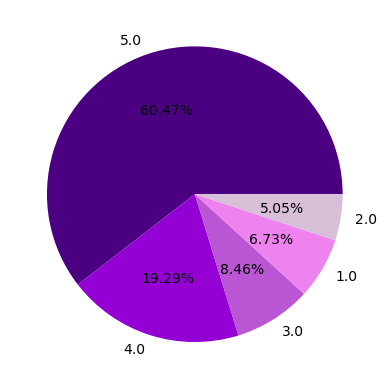

In [9]:
colors = ['indigo', 'darkviolet','mediumorchid','violet','thistle']
labels = subsetData['review/score'].value_counts().keys().map(str)
values = subsetData['review/score'].value_counts()
plt.pie(values,colors=colors,labels=labels,autopct='%1.2f%%')

In [14]:
def split_train_test(subsetData, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(subsetData[['review/summary', 'review/text']], 
                                                        subsetData['review/score'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(subsetData)

Value counts for Train sentiments
5.0    24137
4.0     7674
3.0     3410
1.0     2721
2.0     2058
Name: review/score, dtype: int64
Value counts for Test sentiments
5.0    6099
4.0    1972
3.0     820
1.0     643
2.0     466
Name: review/score, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
     index                                     review/summary  \
0  1237444  Buy the 1999 edition or another collection of ...   
1  2820850                                       Amazing book   
2   511737                              My first Austen Book!   
3  1586180               Not sure what all the fuss is about.   
4  1860685                           Disturbingly familiar...   

                                         review/text  
0  The 1999 edition is better because it contains...  
1  I love the patterns in this book. I cannot wai...  
2  I read Sense and Sensibility for my English IV...  
3  This is the first Tolstoy I have read, I have ...  
4 